# Исследование объявлений о продаже квартир

В нашем распоряжении данные сервиса Яндекс Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Необходимо определить рыночную стоимость объектов недвижимости. Для этого проведем исследовательский анализ данных и установим параметры, влияющие на цену объектов. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность.

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта и других объектов — эти данные автоматически получены из геосервисов. Количество парков и водоёмов также заполняется без участия пользователя.

## Откроем файл с данными и изучем общую информацию

Импортируем библиотеку pandas и matplotlib и отркываем .csv файл с указаением параметра разделителей.
Вывод первые 20 строк.

In [86]:
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv('Downloads/real_estate_data.csv',sep='\t')
data.head(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


Далее знакомимся с общей информацией таблицы.

In [87]:
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


Просмотрев исходные данные и общую информацию, можно сделать несколько выводов:

1) Некоторые столбцы имеют некорректный тип данных ( is_apartment, balcony и др. )

2) Также есть некорректные данные ( максимальное кол-во комнат: 19, в столбце rooms и др.)

3) Также в decribe сразу видно, что в исходных есть пропуски в разных столбцах (ceilling_height, floors_total и др.)
    
    

Для деталнього изучения данных, выведем диграмму по всем числовым показателям в таблице.

array([[<Axes: title={'center': 'total_images'}>,
        <Axes: title={'center': 'last_price'}>,
        <Axes: title={'center': 'total_area'}>,
        <Axes: title={'center': 'rooms'}>],
       [<Axes: title={'center': 'ceiling_height'}>,
        <Axes: title={'center': 'floors_total'}>,
        <Axes: title={'center': 'living_area'}>,
        <Axes: title={'center': 'floor'}>],
       [<Axes: title={'center': 'kitchen_area'}>,
        <Axes: title={'center': 'balcony'}>,
        <Axes: title={'center': 'airports_nearest'}>,
        <Axes: title={'center': 'cityCenters_nearest'}>],
       [<Axes: title={'center': 'parks_around3000'}>,
        <Axes: title={'center': 'parks_nearest'}>,
        <Axes: title={'center': 'ponds_around3000'}>,
        <Axes: title={'center': 'ponds_nearest'}>],
       [<Axes: title={'center': 'days_exposition'}>, <Axes: >, <Axes: >,
        <Axes: >]], dtype=object)

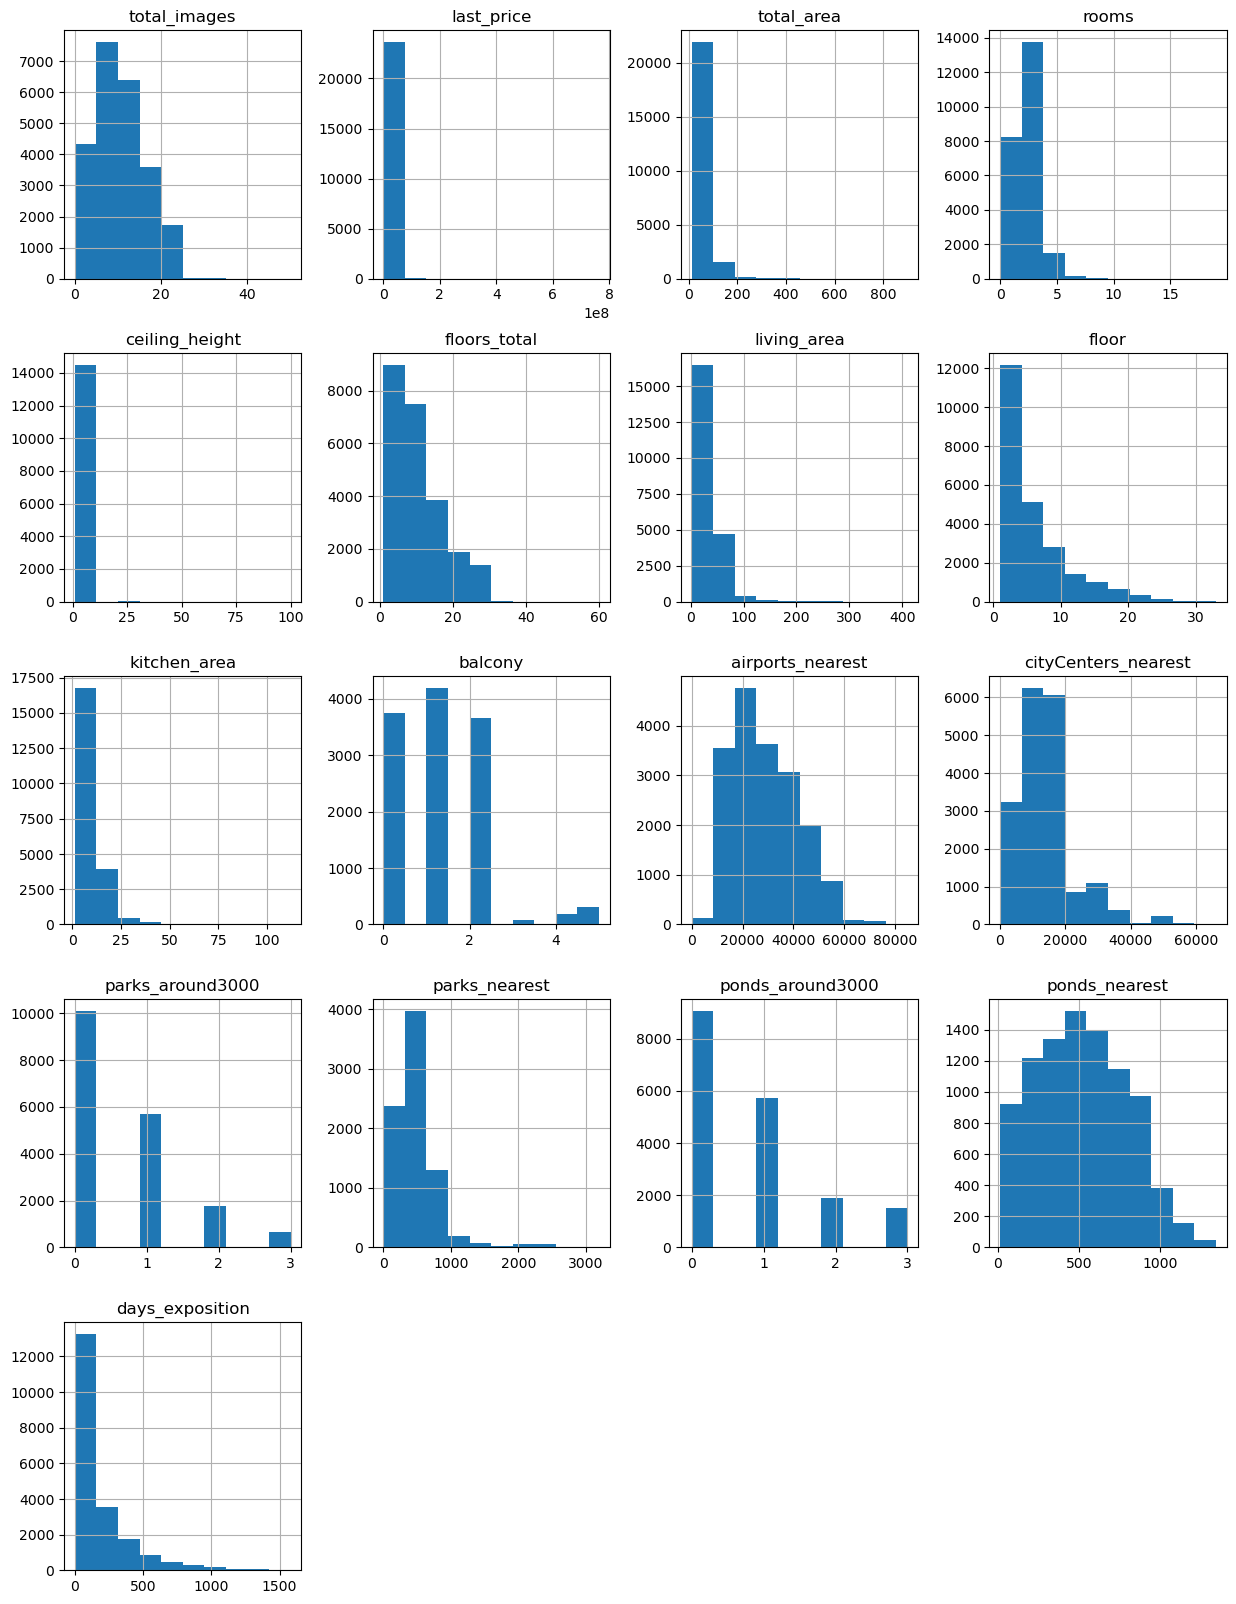

In [88]:
data.hist(figsize=(15, 20))

Сразу можем сделать несколько выводов:
    
    1) Большинство квартир расположены до 10 этажа, также большинство квартир имеют в пределах 1 км парки и пруды.
    2) Нормальное распределение значений у столбца ponds_nearest,total_images,airports_nearest
    3) Выбросы у столбца days_exposition, total_area, parks_nearest, balcony, kitchen_area.
    
    
    

Просмотрев общую информацию о данных, можно сказать, что данные имеют большое кол-во пропусков, аномальных значений.
Работать с такими данными и делать ввыводы по ним не представляется возможным, поэтому необходимо выполнить предобработку данных, скорректировать значения, заменить пропуски ( там, где это возмжно) и обработать дубликаты.

## Предобработка данных

Выведем сумму пропущенных значений по каждому столбцу

In [89]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Заполняем пропущенные значения, там где это возможно:

Заменяем пропуски в ceiling_height медианными значениями т.к. есть аномальные значения и меняем формат данных до 2 знаков после запятой:

In [90]:
data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].median())

In [91]:
data['ceiling_height'] = data['ceiling_height'].round(2)

Заменяем пропуски в floors_total медианными значениями т.к. есть аномальные значения и меняем формат данных на целочисленный:

In [92]:
data['floors_total'] = data['floors_total'].fillna(data['floors_total'].median())
data['floors_total'] = data['floors_total'].astype(int)

Столбец living_area можно заменить средним значений сгрупированных данных по кол-ву комнат, округляем значения до двух знаков после запятой.

In [93]:
for d in data['rooms'].unique():
    data.loc[(data['rooms'] == d) & (data['living_area'].isna()), 'living_area'] = \
    data.loc[data['rooms'] == d, 'living_area'].mean()

In [94]:
data['living_area'] = data['living_area'].round(2)

Пропущенные значения в is_apartment заменяем на False, возможно многие люди просто на просто не знают, что такое апартаменты и чем они отличаются от обычной квартиры, поэтому просто пропускают этот пункт. Меняем тип данных на bool, так как это ответ на вопрос

In [95]:
data['is_apartment'] = data['is_apartment'].fillna(False)
data['is_apartment'] = data['is_apartment'].astype('bool')

Значения kitchen_area заменяем на медианное значение т.к. есть аномальные значения и округляем кол-во знаков после запятой до двух

In [96]:
data['kitchen_area'] = data['kitchen_area'].fillna(data['kitchen_area'].median())

In [97]:
data['kitchen_area'] = data['kitchen_area'].round(2)

В столбце balcony заменяем пропуски на 0, т.к. скорее всего балконов просто нет. Тип данных меняем на int, так как кол-во балконов не может быть 1.5

In [98]:
data['balcony'] = data['balcony'].fillna('0')
data['balcony'] = data['balcony'].astype(int)

Столбец locality_name приводим к нижнем регистру и убираем предписку к населенному пункту.

In [99]:
data['locality_name'] = data['locality_name'].str.lower()
data['locality_name'].unique()

array(['санкт-петербург', 'посёлок шушары', 'городской посёлок янино-1',
       'посёлок парголово', 'посёлок мурино', 'ломоносов', 'сертолово',
       'петергоф', 'пушкин', 'деревня кудрово', 'коммунар', 'колпино',
       'поселок городского типа красный бор', 'гатчина', 'поселок мурино',
       'деревня фёдоровское', 'выборг', 'кронштадт', 'кировск',
       'деревня новое девяткино', 'посёлок металлострой',
       'посёлок городского типа лебяжье',
       'посёлок городского типа сиверский', 'поселок молодцово',
       'поселок городского типа кузьмоловский',
       'садовое товарищество новая ропша', 'павловск',
       'деревня пикколово', 'всеволожск', 'волхов', 'кингисепп',
       'приозерск', 'сестрорецк', 'деревня куттузи', 'посёлок аннино',
       'поселок городского типа ефимовский', 'посёлок плодовое',
       'деревня заклинье', 'поселок торковичи', 'поселок первомайское',
       'красное село', 'посёлок понтонный', 'сясьстрой', 'деревня старая',
       'деревня лесколово', '

In [100]:
data['locality_name'] = data['locality_name'].replace(['поселок', 'посёлок', 'городской посёлок','поселок городского типа','посёлок городского типа','садовое товарищество','деревня','село','городской посёлок', 'поселок городского типа имени', 'посёлок городского типа имени', 'поселок станции','сдоводческое некоммерческое товарищество','колиметр','поселок при железнодорожной станции','коттеджный поселок','коттеджный посёлок'], '', regex= True)

Далее заменяем пропущенные значения на 'Другой'

In [101]:
data['locality_name'] = data['locality_name'].fillna('Другой')

Меняем название столбца cityCenters_nearest на нижний регистр

In [102]:
data.rename(columns={'cityCenters_nearest':'city_center_nearest'}, inplace=True)

В столбцах parks_around3000, ponds_around3000 заполняем пропуски 0, так как можно предположить, что система просто не нашла данные, то скорее всего их просто нет, также заменяем тип данных на int (т.к. кол-во парков и прудов целое число).

In [103]:
data['parks_around3000'] = data['parks_around3000'].fillna('0')
data['parks_around3000'] = data['parks_around3000'].astype(int)
data['ponds_around3000'] = data['ponds_around3000'].fillna('0')
data['ponds_around3000'] = data['ponds_around3000'].astype(int)

Также столбцы first_day_exposition приводим к общему формату даты и времени.

In [104]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='ISO8601')

Выводим общее кол-во пропусков по каждому столбцу и проверяем общее кол-во явных дубликатов в исходных данных.

In [105]:
display(data.isna().sum(),data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23699 non-null  float64       
 2   total_area            23699 non-null  float64       
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int64         
 5   ceiling_height        23699 non-null  float64       
 6   floors_total          23699 non-null  int32         
 7   living_area           23699 non-null  float64       
 8   floor                 23699 non-null  int64         
 9   is_apartment          23699 non-null  bool          
 10  studio                23699 non-null  bool          
 11  open_plan             23699 non-null  bool          
 12  kitchen_area          23699 non-null  float64       
 13  balcony         

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name               0
airports_nearest         5542
city_center_nearest      5519
parks_around3000            0
parks_nearest           15620
ponds_around3000            0
ponds_nearest           14589
days_exposition          3181
dtype: int64

None

In [106]:
data.head(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_center_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.00,8,False,...,25.0,0,санкт-петербург,18863.0,16028.0,1,482.0,2,755.0,NaN
1,7,3350000.0,40.4,2018-12-04,1,2.65,11,18.60,1,False,...,11.0,2,шушары,12817.0,18603.0,0,NaN,0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20,2,2.65,5,34.30,4,False,...,8.3,0,санкт-петербург,21741.0,13933.0,1,90.0,2,574.0,558.0
3,0,64900000.0,159.0,2015-07-24,3,2.65,14,47.39,9,False,...,9.1,0,санкт-петербург,28098.0,6800.0,2,84.0,3,234.0,424.0
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.00,13,False,...,41.0,0,санкт-петербург,31856.0,8098.0,2,112.0,1,48.0,121.0


In [107]:
print('Общее кол-во дубликатов:', data.duplicated().sum())

Общее кол-во дубликатов: 0


По итогам предобработки данных:

1) Заменили пропуски в таких столбцах как: floors_total, ceiling_height, kitchen_area медианными значениями ( т.к. в этих столбцах есть явные аномальные значения)

2) Пропуски в столбце living_area заменили средними значениями, сгрупированных данных по столбцу rooms

3) В столбце is_apartment заменили пропущенные значение на False и изменили тип данных на bool

4) Пропущенные значения в столбцах balcony, parks_around3000, ponds_around3000 заменили на 0, так как скорее всего их просто нет

5) Скорректировали название столбца cityCenters_nearest на city_centers_nearest

6) Сменили тип данных в столбцах, где это необходимо и округлили значения до 1 знака после запятой некоторых столбцов

7) Заменить пропуски в таких столбцах как : airports_nearest, city_center_nearest, parks_nearest, ponds_nearest, days_exposition, не удалось так как нет соответсвующих данных для замены возможных значений.

В целом, удалось добиться существенного снижения пропусков, однако в некоторых столбцах они остались, но критики для дальнейших расчетов нет.

## Добавим в таблицу новые столбцы

Добавляем столбец price_per_area с ценой за кв.м

In [108]:
data['price_per_area'] = (data['last_price']/data['total_area']).round(2)

Добавляем столбец week_day_exposition с днем недели (0 - понедельник, 1 - вторник и тд)

In [109]:
data['week_day_exposition'] = pd.DatetimeIndex(data['first_day_exposition']).weekday

Добавляем столбец month_exposition с номером месяца

In [110]:
data['month_exposition'] = pd.DatetimeIndex(data['first_day_exposition']).month

Добавляем столбец year_exposition с годом

In [111]:
data['year_exposition'] = pd.DatetimeIndex(data['first_day_exposition']).year

Добавляем столбец categorize_floor с типом этажа квартиры ( первый, последний и другой)

In [112]:
def categorize_floor(row):
        if row['floor'] == 1:
            return 'первый'
        if row['floor'] == row['floors_total']:
            return 'последний'
        else:
            return 'другой'
data['type_floor'] = data.apply(categorize_floor,axis=1)

Добавляем столбец city_center_nearest_km c расстоянием до центра города в км и округляем до целого числа

In [113]:
data['city_center_nearest_km'] = (data['city_center_nearest']/1000).round()

In [114]:
data.head(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_area,week_day_exposition,month_exposition,year_exposition,type_floor,city_center_nearest_km
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.00,8,False,...,482.0,2,755.0,NaN,120370.37,3,3,2019,другой,16.0
1,7,3350000.0,40.4,2018-12-04,1,2.65,11,18.60,1,False,...,NaN,0,NaN,81.0,82920.79,1,12,2018,первый,19.0
2,10,5196000.0,56.0,2015-08-20,2,2.65,5,34.30,4,False,...,90.0,2,574.0,558.0,92785.71,3,8,2015,другой,14.0
3,0,64900000.0,159.0,2015-07-24,3,2.65,14,47.39,9,False,...,84.0,3,234.0,424.0,408176.10,4,7,2015,другой,7.0
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.00,13,False,...,112.0,1,48.0,121.0,100000.00,1,6,2018,другой,8.0


## Исследовательский анализ данных

### Изучаем параметры исходных данных и описываем графики

Построим гистрограмму заисимости кол-ва квартир от общей площади

In [115]:
data['total_area'].describe()

count    23699.000000
mean        60.348651
std         35.654083
min         12.000000
25%         40.000000
50%         52.000000
75%         69.900000
max        900.000000
Name: total_area, dtype: float64

По описанию данных столбца total_area, видно что основная масса квартир имеет общую площадь до 70 кв.м. Построим график, ограничив его значением близкому к 3 квартилю.

Text(0, 0.5, 'Кол-во квартир')

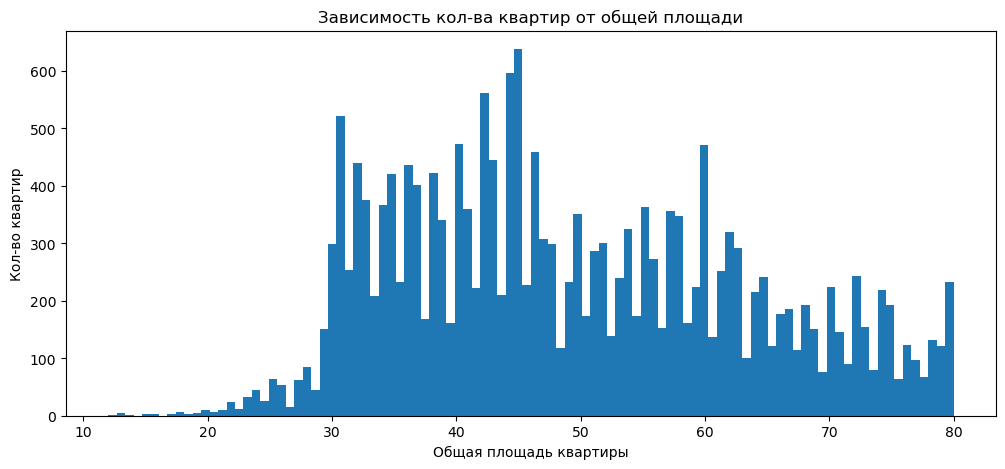

In [116]:
data['total_area'].plot(kind='hist',bins = 100, figsize=(12,5),range = (12,80),title='Зависимость кол-ва квартир от общей площади')
plt.xlabel('Общая площадь квартиры')
plt.ylabel('Кол-во квартир')


На графике видно, что в диапозоне от 40 до 70 кв.м. содержится основная масса квартир с пиковой точкой в 45 кв.м., где наибольшее число квартир. Однако на распределнии всего графика видны резкие просадки в районе 31, 60 кв.м

Выведем характеристики данных столбца living_area, а затем построим гистограмму жилой площади квартир, ограничив его значением близкому к третьему квартилю.

In [117]:
data['living_area'].describe()

count    23699.000000
mean        34.441172
std         21.802182
min          2.000000
25%         18.400000
50%         30.300000
75%         42.700000
max        409.700000
Name: living_area, dtype: float64

Text(0, 0.5, 'Кол-во квартир')

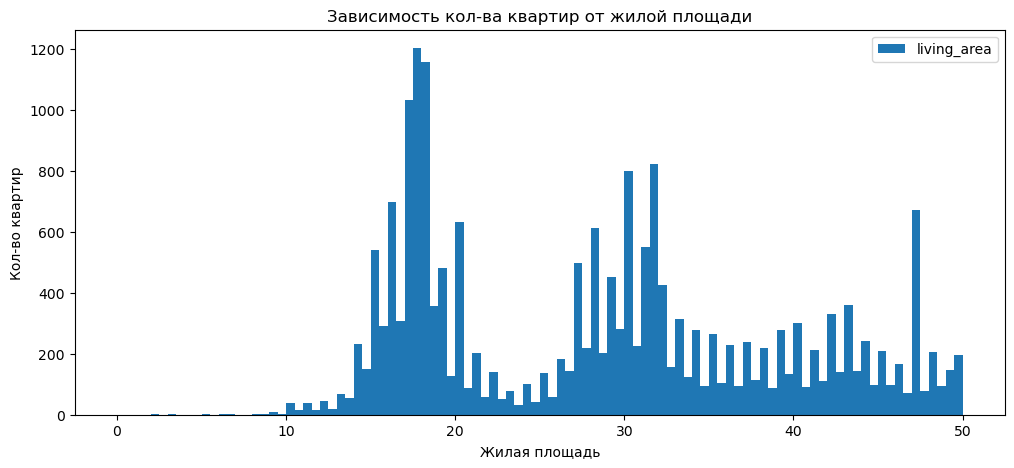

In [118]:
data['living_area'].plot(kind='hist', bins=100, figsize=(12,5),range=(0,50),legend=True,title='Зависимость кол-ва квартир от жилой площади')
plt.xlabel('Жилая площадь')
plt.ylabel('Кол-во квартир')

Исходя из графика, можно сделать вывод, что больше всего квартир продается в районе с 18 до 40 кв.м. Есть три пиковых значения в районе 18, 32 и 44 скорее всего это связано с тем, что в этой жилой площади находятся стандартные размеры 1-комнатный квартир, 2-ух и 3-ёх комнатных квартир.Также есть спад предложений, начиная с 21 кв.м.

Выведем описание данных столбца kitchen_area и построим график с кухонной площадью с диаопозоном до близкого значения к третьему квартилю.

In [119]:
data['kitchen_area'].describe()

count    23699.000000
mean        10.428526
std          5.631126
min          1.300000
25%          7.400000
50%          9.100000
75%         11.440000
max        112.000000
Name: kitchen_area, dtype: float64

Text(0, 0.5, 'Кол-во квартир')

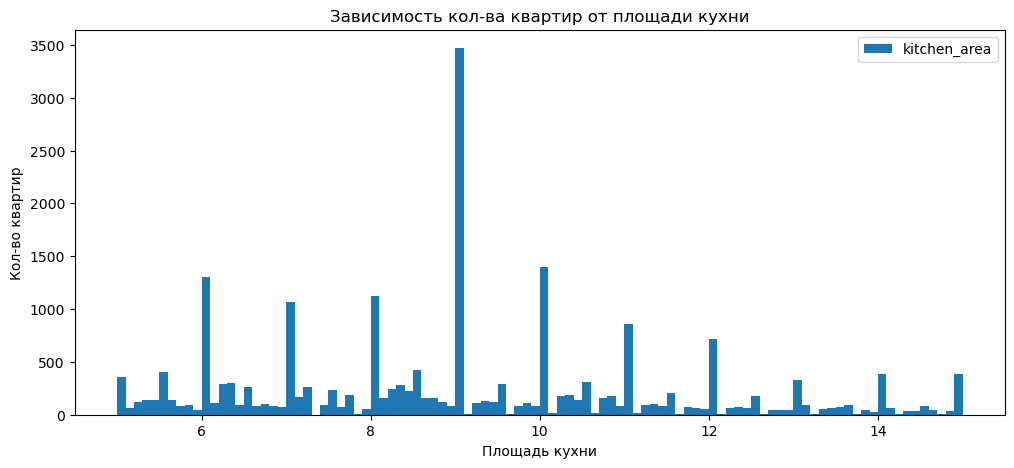

In [120]:
data['kitchen_area'].plot(kind='hist',title='Зависимость кол-ва квартир от площади кухни', bins=100, figsize=(12,5),range=(5,15),legend=True)
plt.xlabel('Площадь кухни')
plt.ylabel('Кол-во квартир')

Большая часть значений распределена в пределах от 7 до 12 кв.м, также на графике видно, что пиковые точки имеют значения целых чисел: 6,7,8, 9 и тд.

Рассмотрим характеристики данных столбца last_price и посмотрим гистрограмму значения цены объектов, ограничив график значением близкому к третьему квартилю.

In [121]:
data['last_price'].describe()

count    2.369900e+04
mean     6.541549e+06
std      1.088701e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.800000e+06
max      7.630000e+08
Name: last_price, dtype: float64

Text(0, 0.5, 'Кол-во квартир')

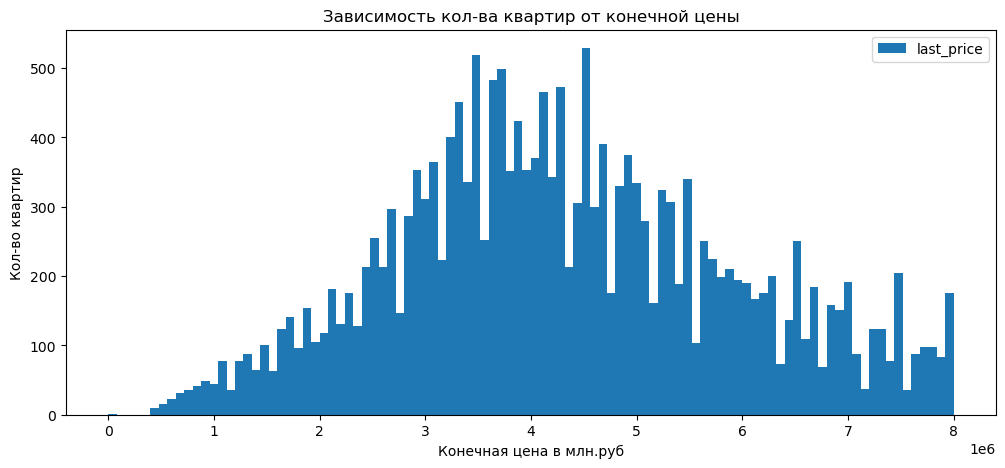

In [122]:
data['last_price'].plot(kind='hist',title='Зависимость кол-ва квартир от конечной цены',bins=100, range =(0,8000000),figsize=(12,5),legend=True)
plt.xlabel('Конечная цена в млн.руб')
plt.ylabel('Кол-во квартир')

Большая часть квартир стоят в районе с 3  до 8 млн. руб. с пиковой точкой в районе - 4.5

Далее выводим информацию о столбце rooms и строим график кол-ва комнат

In [123]:
data['rooms'].describe()

count    23699.000000
mean         2.070636
std          1.078405
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

Text(0, 0.5, 'Кол-во квартир')

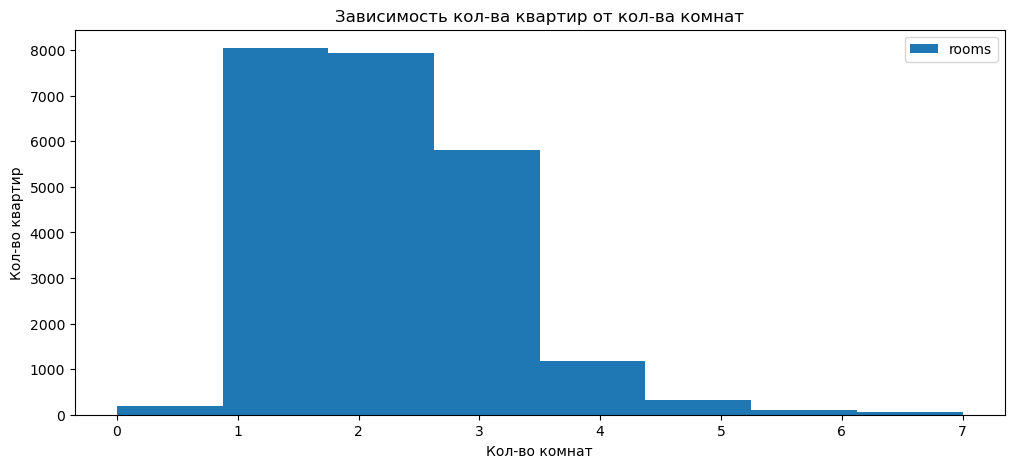

In [124]:
data['rooms'].plot(kind='hist',title='Зависимость кол-ва квартир от кол-ва комнат',bins=8, range=(0,7), figsize=(12,5),legend=True)
plt.xlabel('Кол-во комнат')
plt.ylabel('Кол-во квартир')

Основная доля квартир приходится на 1,2,3-ех комнатные. Наибольшее число квартир с 1-ой комнатой далее график идет на снижение, что может говорит о возможной линейной зависимости.

Выведем информацию о столбце ceiling_height и посмтроим гистограмму зависимоти кол-ва квартир и высоты потолков в диапозоне близкому к третьему квартилю.

In [125]:
data['ceiling_height'].describe()

count    23699.000000
mean         2.724358
std          0.988298
min          1.000000
25%          2.600000
50%          2.650000
75%          2.700000
max        100.000000
Name: ceiling_height, dtype: float64

Text(0, 0.5, 'Кол-во квартир')

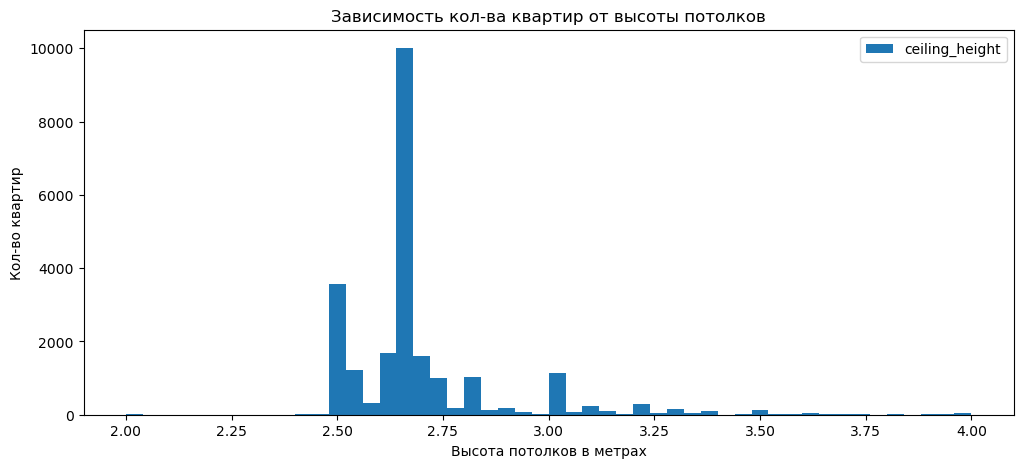

In [126]:
data['ceiling_height'].plot(kind='hist',title='Зависимость кол-ва квартир от высоты потолков', bins=50,range=(2,4),figsize=(12,5), legend=True)
plt.xlabel('Высота потолков в метрах')
plt.ylabel('Кол-во квартир')

Можно сделать вывод, что основная масса квартир имеет потолки высотой от 2,5 до 2,8 м, также есть выбивающиеся значения начинающиеся от  3.5м и далее, квартир по которым очень мало

Выведем информацию о столбце type_floor и построим круговую диаграмму

In [127]:
data.pivot_table(index='type_floor',values='total_images',aggfunc=('count')).describe(),

(       total_images
 count      3.000000
 mean    7899.666667
 std     8265.756186
 min     2917.000000
 25%     3129.000000
 50%     3341.000000
 75%    10391.000000
 max    17441.000000,)

Text(0.5, 1.0, 'Диаграмма типа этажей')

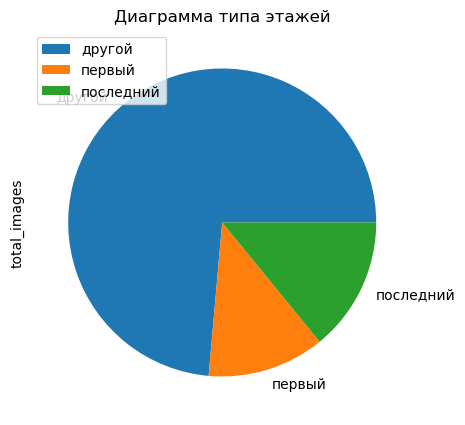

In [128]:
data.pivot_table(index='type_floor',values='total_images',aggfunc=('count')).plot(kind='pie',y='total_images',figsize=(12,5)),
plt.title('Диаграмма типа этажей')

На данной диаграмме видно, что кол-во этаже 'по середине' является наиболее популярным, в то время как первый и последний этаж составляют чуть больше четверти квартир.

Взглянем характеристики столбца floors_total и на основе данных построим гистограмму зависимости кол-ва квартир и общее кол-во этажей в доме в диаопозоне близкому к третьему квартилю.

In [129]:
data['floors_total'].describe()

count    23699.000000
mean        10.667750
std          6.585961
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

Text(0.5, 1.0, 'Зависимость кол-ва квартир и общего кол-ва этажей')

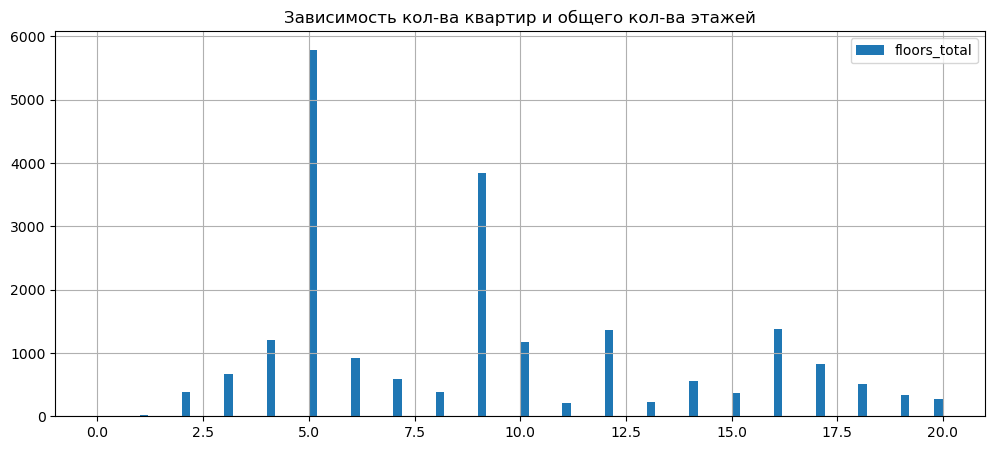

In [130]:
data.hist('floors_total', bins=100, range=(0,20), figsize=(12,5),legend=True)
plt.title('Зависимость кол-ва квартир и общего кол-ва этажей')

Видно, что есть две пиковые точки на 5 и 9-и этажах, возможно это связано с тем, что типовые многоквартирные дома строятся как раз на 5 этажей и 10. Можно предположить, что домая, расположенные в областях и на окраине города, имеют 5 этажей, а недвижимость, находящаяся в черте города,как раз имеет 9 этажей.

Выведем информацию о столбце city_center_nearest и посмтроим график зависимости кол-ва квартир и расположения относительно центра

In [131]:
data['city_center_nearest'].describe()

count    18180.000000
mean     14191.277833
std       8608.386210
min        181.000000
25%       9238.000000
50%      13098.500000
75%      16293.000000
max      65968.000000
Name: city_center_nearest, dtype: float64

Text(0.5, 1.0, 'Зависимость кол-ва квартир и расстояния относительно центра')

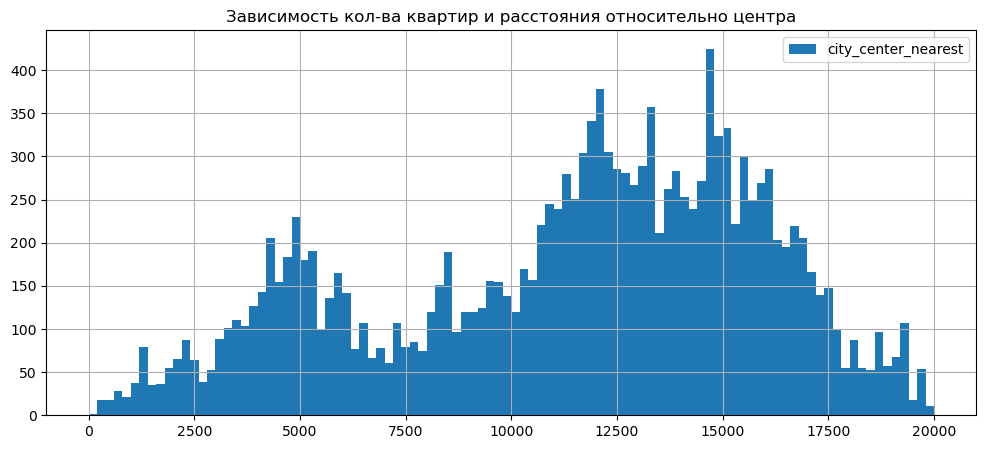

In [132]:
data.hist('city_center_nearest',bins=100,figsize=(12,5),range=(0,20000),legend=True),
plt.title('Зависимость кол-ва квартир и расстояния относительно центра')

Здесь мы видим нибольшее кол-во предложений в районе от 10 км до 15 км, на мой взгляд среднее расстояние до центра города в больших городах ( ни много, ни мало), также видим спад кол-ва квартир после отметки в 15 км.

Выведем информацию о данных столбца parks_nearest и построим график расстояния до ближайшего парка

In [133]:
data['parks_nearest'].describe()

count    8079.000000
mean      490.804555
std       342.317995
min         1.000000
25%       288.000000
50%       455.000000
75%       612.000000
max      3190.000000
Name: parks_nearest, dtype: float64

Text(0.5, 1.0, 'Зависимость кол-ва квартир и расстояния до ближ. парков')

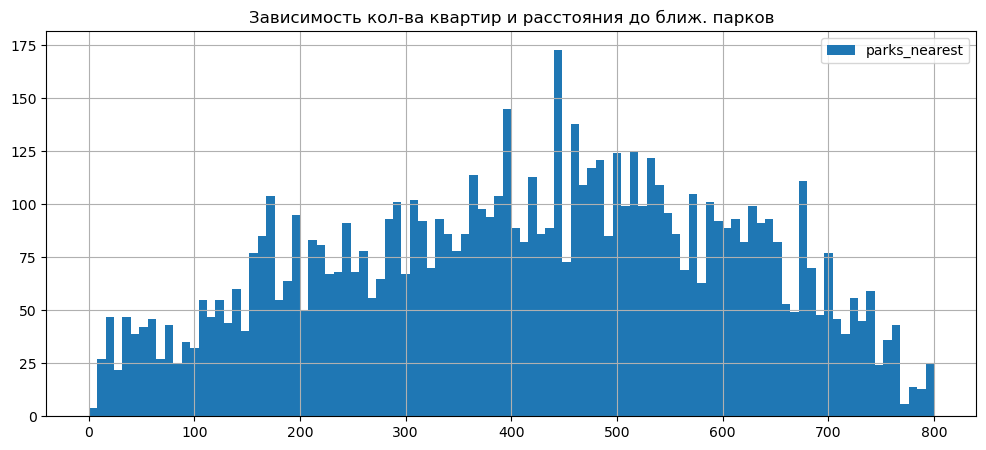

In [134]:
data.hist('parks_nearest',bins=100, figsize=(12,5),range=(0,800),legend=True)
plt.title('Зависимость кол-ва квартир и расстояния до ближ. парков')

Больше всего квартир с парками в районе от 200 до 700 метров, с явным пиком у 450 м., далее чем больше расстояние тем меньше предложений. 

###  Далее смотрим насколько быстро продавались квартиры:

Создаем гистограмму зависимости кол-ва продаж и дней до момента закрытия продажи

count    20518.000000
mean       180.888634
std        219.727988
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

<Axes: title={'center': 'Зависимость кол-ва продаж и кол-ва дней до момента продажи'}>

Text(0.5, 1.0, 'Зависимость кол-ва продаж и кол-ва дней до момента продажи')

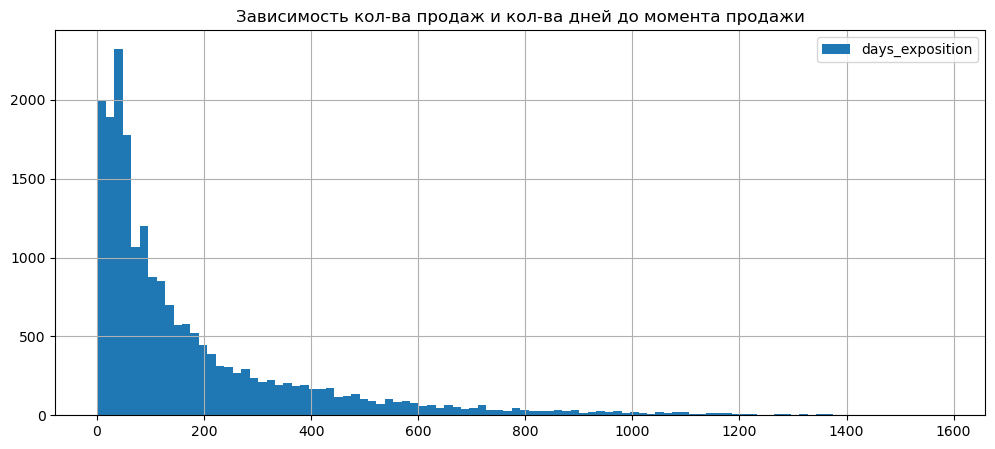

In [135]:
display(data['days_exposition'].describe(),
        data['days_exposition'].hist(bins=100,figsize=(12,5),legend=True),
        plt.title('Зависимость кол-ва продаж и кол-ва дней до момента продажи'))

In [136]:
print('Среднее значение кол-ва дней:', data['days_exposition'].mean().round())

Среднее значение кол-ва дней: 181.0


In [137]:
print('Медиана кол-ва дней:', data['days_exposition'].median())

Медиана кол-ва дней: 95.0


Медиана и ср.значение слишком сильно разнятся из за аномальных значений, взглянем на "ящик с усами"

(0.0, 800.0)

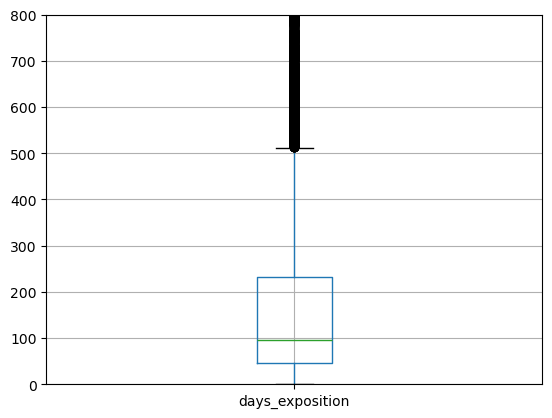

In [138]:
data.boxplot('days_exposition')
plt.ylim(0,800)

Огромное кол-во аномалий, выведем 95 перцентиль и от него посмотрим долю аномальных значений от общего кол-ва

In [139]:
data['days_exposition'].quantile(.95)

647.0

In [140]:
print('Доля аномальных значений:', len(data.query('days_exposition > 647'))/len(data)*100)

Доля аномальных значений: 4.3250770074686695


Так как доля аномальных значений всего 4.3 процентов, оставим эти данные

count    20518.000000
mean       180.888634
std        219.727988
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

<Axes: title={'center': 'Зависимость кол-ва продаж и кол-ва дней до момента продажи'}>

Text(0.5, 1.0, 'Зависимость кол-ва продаж и кол-ва дней до момента продажи')

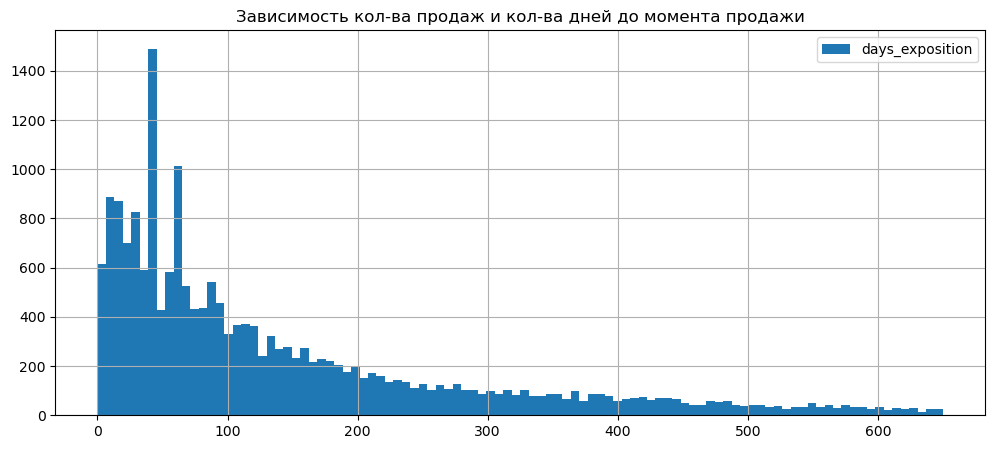

In [141]:
display(data['days_exposition'].describe(),
        data['days_exposition'].hist(bins=100,figsize=(12,5),legend=True,range=(0,650)),
        plt.title('Зависимость кол-ва продаж и кол-ва дней до момента продажи'))

Таким образом, мы видим, что наибольшее кол-во квартир продается в период до 3 месяцев.
Также видим резкие скачки в районе 40 и 60 дней. Быстрыми продажами можно считать все те, которые расположены в первом квартиле т.е. до 45 дней, а наиболее долгими здесь буду продажи квартир от 230 дней и далее.

### Далее определяем факторы, которые наиболее всего влияют на конечную стоимость путем корреляции данных

In [142]:
data.pivot_table(index='floor', values=['last_price','total_area','living_area','kitchen_area','rooms','week_day_exposition','month_exposition','year_exposition']).corr()

,kitchen_area,last_price,living_area,month_exposition,rooms,total_area,week_day_exposition,year_exposition
kitchen_area,1.000000,0.312370,0.107218,-0.020625,0.128989,0.423262,0.486047,-0.309570
last_price,0.312370,1.000000,0.620921,-0.019113,0.442449,0.738972,0.323738,-0.052080
living_area,0.107218,0.620921,1.000000,-0.156867,0.900936,0.920798,0.080707,-0.055953
month_exposition,-0.020625,-0.019113,-0.156867,1.000000,-0.289615,-0.056876,0.269221,-0.355876
rooms,0.128989,0.442449,0.900936,-0.289615,1.000000,0.811538,-0.059111,-0.046553
total_area,0.423262,0.738972,0.920798,-0.056876,0.811538,1.000000,0.320962,-0.091682
week_day_exposition,0.486047,0.323738,0.080707,0.269221,-0.059111,0.320962,1.000000,0.181063
year_exposition,-0.309570,-0.052080,-0.055953,-0.355876,-0.046553,-0.091682,0.181063,1.000000


Исходя из таблицы, можно сделать вывод, что наблюдается слабая зависимость между:
1) конечной ценой и кол-вом комнат;

2) конечной ценой и площадью кухонной зоны;

3) конечной ценой и днем размещения объявления;

Также присутствует и сильная связь между:

1) конечной ценой и жилой площадью;

2) конечной ценой и общей площадью квартиры.

Однако можно рассчитать корреляцию без выбросов, т.е. в пределах 95% нормальных значений, создадим функцию, возможно это даст более высокие показатели корреляции:

In [143]:
def emission_free(data, column):
    q_5per = data[column].quantile(0.05)
    q_95per = data[column].quantile(0.95)
    row = data.loc[(data[column] > q_5per) & (data[column] < q_95per), column]
    return row
emission = ['last_price','total_area','living_area','kitchen_area','rooms','ceiling_height']
for h in emission:
    data[h] = emission_free(data, h)

In [144]:
data.pivot_table(index='floor', values=['last_price','total_area','living_area','kitchen_area','rooms','week_day_exposition','month_exposition','year_exposition']).corr()

,kitchen_area,last_price,living_area,month_exposition,rooms,total_area,week_day_exposition,year_exposition
kitchen_area,1.000000,0.363500,-0.232031,0.201394,-0.351671,0.215789,0.621866,0.199180
last_price,0.363500,1.000000,0.751845,0.018465,0.176564,0.903860,0.634114,0.071754
living_area,-0.232031,0.751845,1.000000,-0.148424,0.660690,0.928501,0.133356,-0.036581
month_exposition,0.201394,0.018465,-0.148424,1.000000,0.129504,-0.036546,0.269221,-0.355876
rooms,-0.351671,0.176564,0.660690,0.129504,1.000000,0.533517,-0.364832,-0.437726
total_area,0.215789,0.903860,0.928501,-0.036546,0.533517,1.000000,0.398263,-0.048280
week_day_exposition,0.621866,0.634114,0.133356,0.269221,-0.364832,0.398263,1.000000,0.181063
year_exposition,0.199180,0.071754,-0.036581,-0.355876,-0.437726,-0.048280,0.181063,1.000000


Как и предпологалось в пределах 95% нормальных значений данных, мы видим уже более сильную корреляцию зависимостей:
    
    1) Конечная цена от жилой площади
    
    2) Конечная цена от общей площади
    
    3) Конечная цена и кол-во комнат
    
Однако сброс аномальных значений за пределам 95% данных, уменьшило связь между кол-вом комнат и конечной ценой.

Text(0.5, 1.0, 'Зависимость цены от площади кухни')

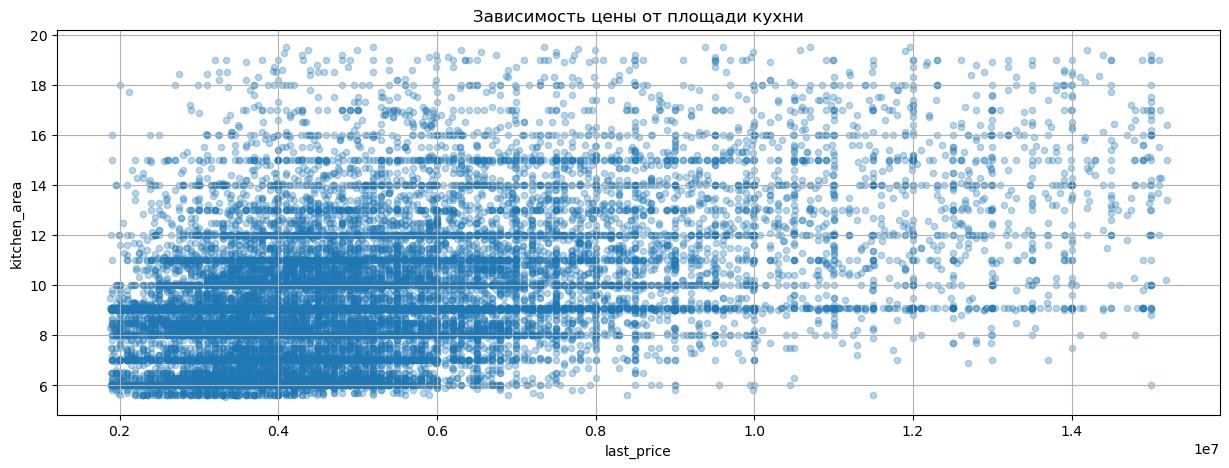

In [145]:
data.plot(x='last_price', y='kitchen_area',kind='scatter',alpha=0.3,grid=True,figsize=(15,5))
plt.title('Зависимость цены от площади кухни')

Text(0.5, 1.0, 'Зависимость цены от жилой площади')

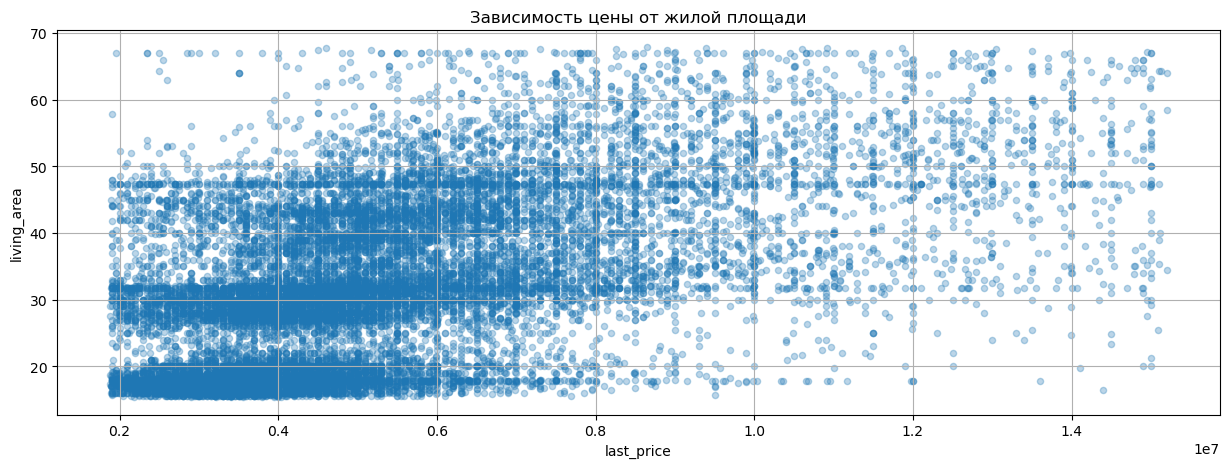

In [146]:
data.plot(x='last_price', y='living_area',kind='scatter',alpha=0.3,grid=True,figsize=(15,5))
plt.title('Зависимость цены от жилой площади')

Text(0.5, 1.0, 'Зависимость цены от кол-ва комнат')

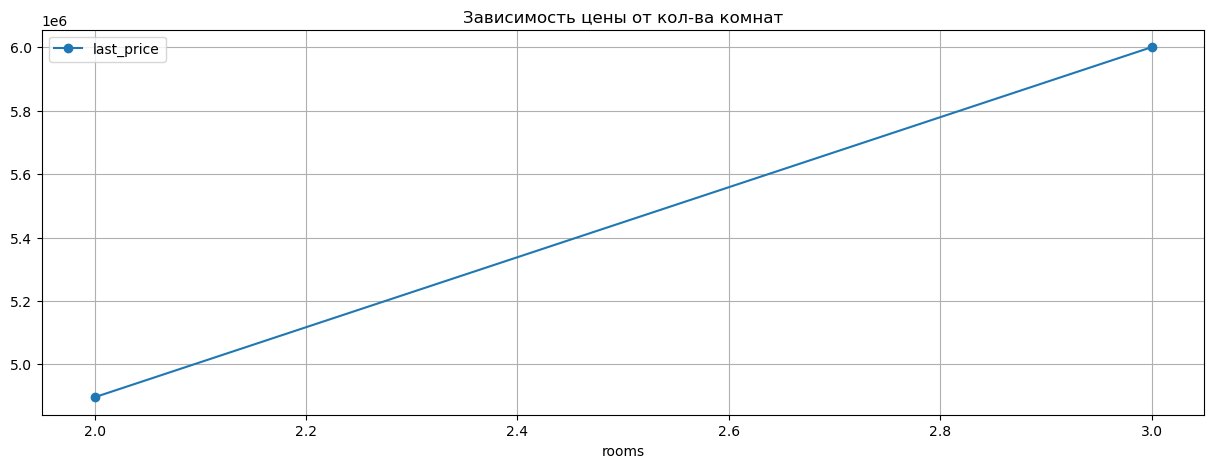

In [147]:
data.pivot_table(index='rooms', values='last_price', aggfunc=('median')).plot(style='o-',grid=True,figsize=(15,5))
plt.title('Зависимость цены от кол-ва комнат')

Text(0.5, 1.0, 'Зависимость цены от общей площади')

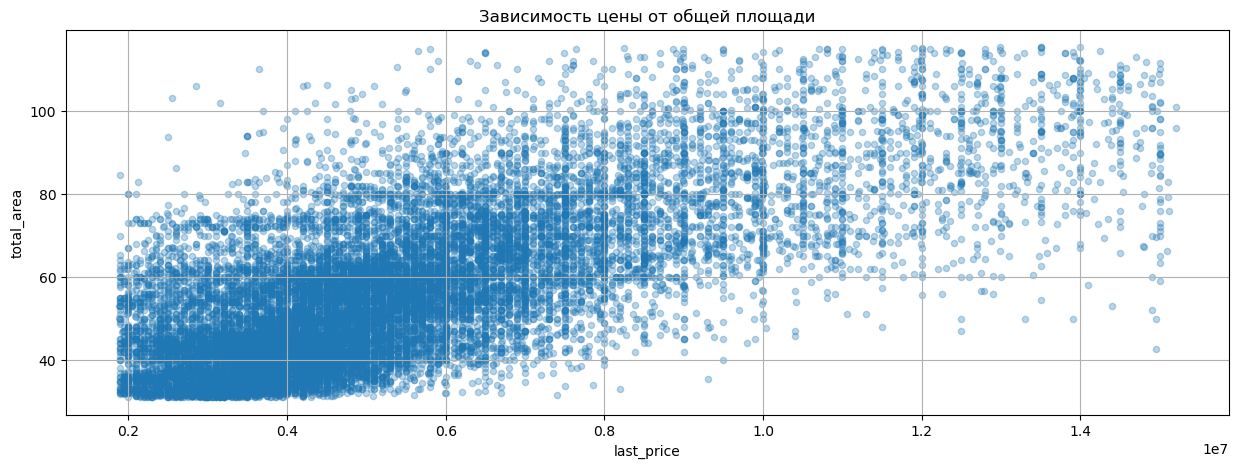

In [148]:
data.plot(x='last_price', y='total_area',kind='scatter',alpha=0.3, grid=True,figsize=(15,5))
plt.title('Зависимость цены от общей площади')

Text(0.5, 1.0, 'Зависимость цены от дня недели размещения')

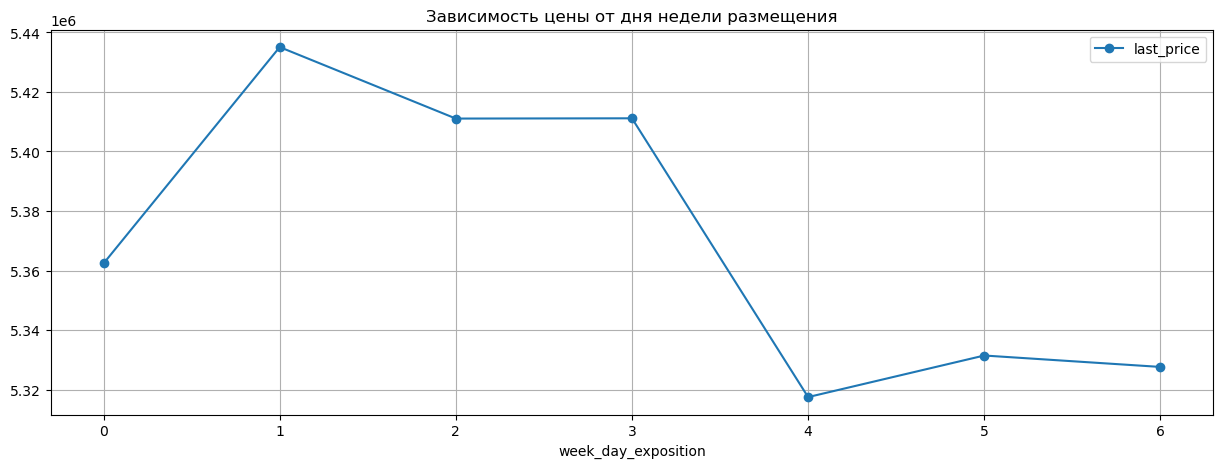

In [149]:
data.pivot_table(index='week_day_exposition', values='last_price', aggfunc=('mean')).plot(style=('o-'), grid=True,figsize=(15,5))
plt.title('Зависимость цены от дня недели размещения')

Text(0.5, 1.0, 'Зависимость цены от месяца размещения')

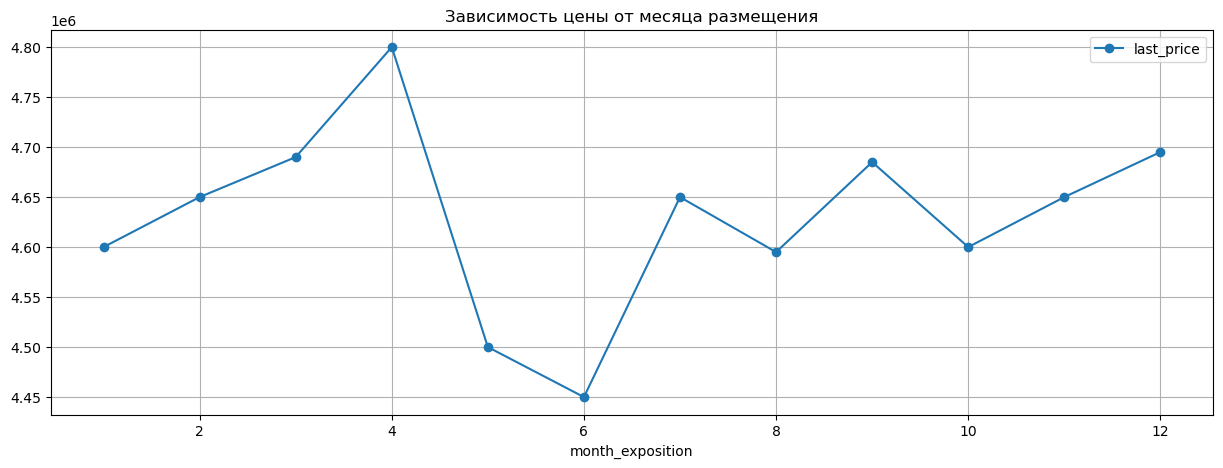

In [150]:
data.pivot_table(index='month_exposition', values='last_price',aggfunc=('median')).plot(style='o-',grid=True,figsize=(15,5))
plt.title('Зависимость цены от месяца размещения')

Text(0.5, 1.0, 'Зависимость цены от года размещения')

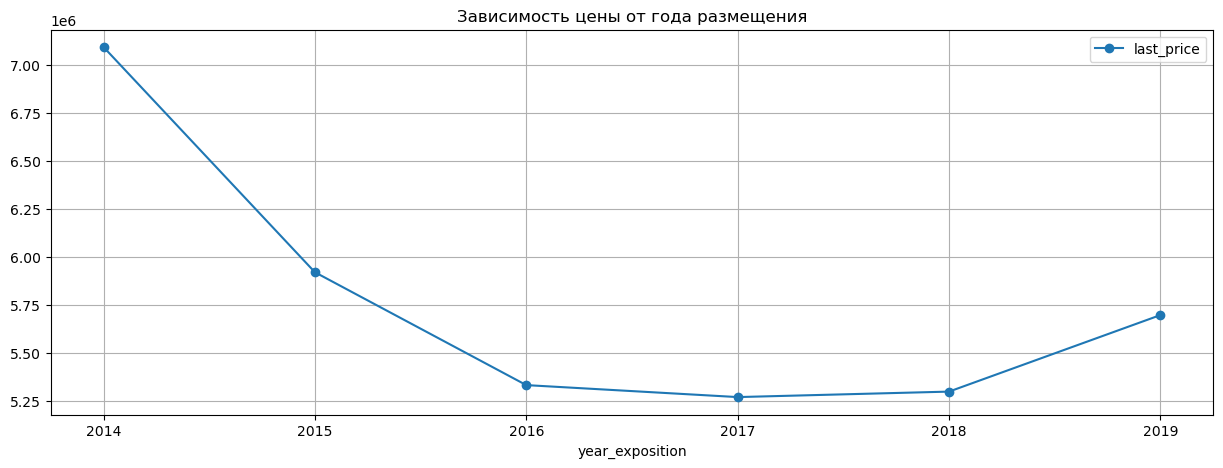

In [151]:
data.pivot_table(index='year_exposition', values='last_price',aggfunc=('mean')).plot(style=('o-'), grid=True,figsize=(15,5))
plt.title('Зависимость цены от года размещения')

Text(0.5, 1.0, 'Зависимость цены от типа этажа')

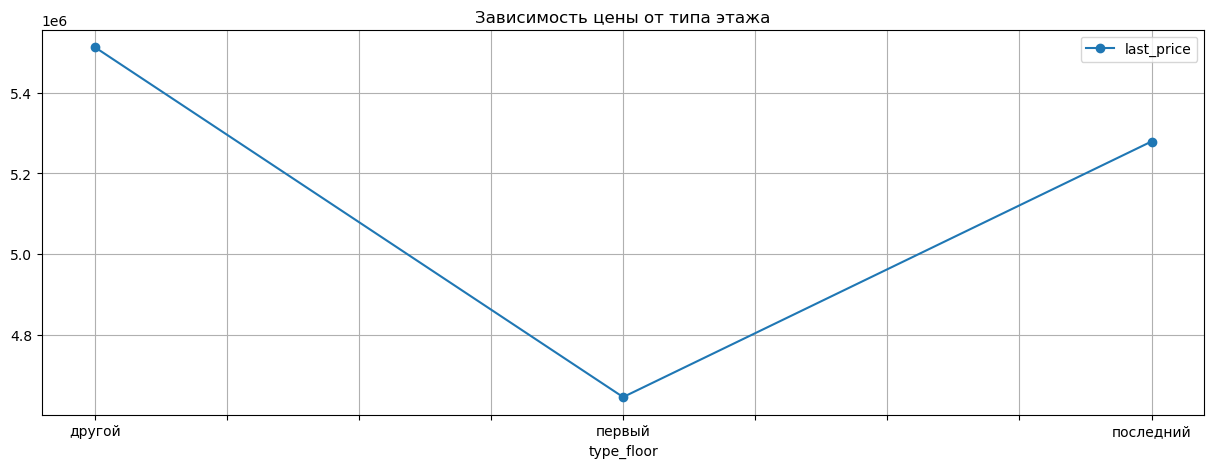

In [152]:
data.pivot_table(index='type_floor',values='last_price',aggfunc=('mean')).plot(style=('o-'),grid=True,figsize=(15,5))
plt.title('Зависимость цены от типа этажа')

Таким образом, в пределах нормальных значений, цена квартиры зависит:

1) от общей и жилой площади, что логично, чем больше площадь, тем больше цена

2) также слабая зависимость цены от дня недели, что на мой взгляд странно, возможно после отдыха в конце недели, люди принимают решение увелчить бюджет покупки квартиры и начинают рассматривать другие варианты, а объявления размещенные в начале недели расположенны выше всех остальных.

Также из интересного, что цена на недвижимость до 2014 была довольно высокой, а после пошла на спад, но в 2018 году снова начала медленно расти.

### Выведем топ 10 населенных пунктов, где самые высокие и низкие показатели цены квадратного метра, а также кол-во таких объявлений.

In [153]:
price_place = data.pivot_table(index='locality_name',values='price_per_area',aggfunc=('mean'))
price_place['count'] = data.pivot_table(index='locality_name', values='price_per_area',aggfunc=('count'))
print('Самые высокие показатели цены за кв.м.:', price_place.sort_values('price_per_area',ascending=False).head(10))

print('Самые низкие показатели цены за кв.м.:',price_place.sort_values('price_per_area',ascending=False).tail(10))


Самые высокие показатели цены за кв.м.:                  price_per_area  count
locality_name                         
зеленогорск       115122.799583     24
санкт-петербург   114849.008793  15721
 репино           104238.612500      4
пушкин            103125.819377    369
сестрорецк        101757.616831    183
 лисий нос        100660.816667      3
кудрово           100253.043237    173
 мистолово         98549.977273     11
 левашово          96997.690000      1
Другой             94309.995102     49
Самые низкие показатели цены за кв.м.:                   price_per_area  count
locality_name                          
 житково               14956.275      2
 ям-тесово             13711.555      2
 сижно                 13709.680      1
 тёсово-4              12931.030      1
 малая романовка       12724.550      1
 совхозный             12629.130      2
 выскатка              12335.480      2
 вахнова кара          11688.310      1
 станции свирь         11481.480      2
 старополье  

На первых местах расположились Зеленогорск и Санкт-Петербург. Возможно Зеленогорск имеет высокую цену из за популярности среди туристов, огромного кол-ва парков,шикарных видов на природу, а также близость к самому Санкт-Петербургу.
Среди худших это посёлок Житково и деревня Ям-Тёсово, скорее всего здесь недвижимость имеет низкую цену из за слабой инфраструктуры и слишком большого расстояния до Санкт-Петербурга.

### Зависимость стоимости квартиры в Санкт-Петербурге от расстояния до центра

In [154]:
price_sp = data.query('locality_name == "санкт-петербург"').pivot_table(index='city_center_nearest_km',values='last_price', aggfunc=('mean'))
display(price_sp.describe(), price_sp)

,last_price
count,3.000000e+01
mean,6.230302e+06
std,1.731176e+06
min,3.854430e+06
25%,5.029240e+06
50%,5.614084e+06
75%,7.750121e+06
max,9.606154e+06


,last_price
city_center_nearest_km,
0.0,9.606154e+06
1.0,9.306198e+06
2.0,9.129489e+06
3.0,8.345745e+06
4.0,8.609509e+06
5.0,8.564956e+06
6.0,7.899976e+06
7.0,7.300556e+06
8.0,7.231135e+06


Text(0.5, 1.0, 'Зависимость цены от расстояния до центра')

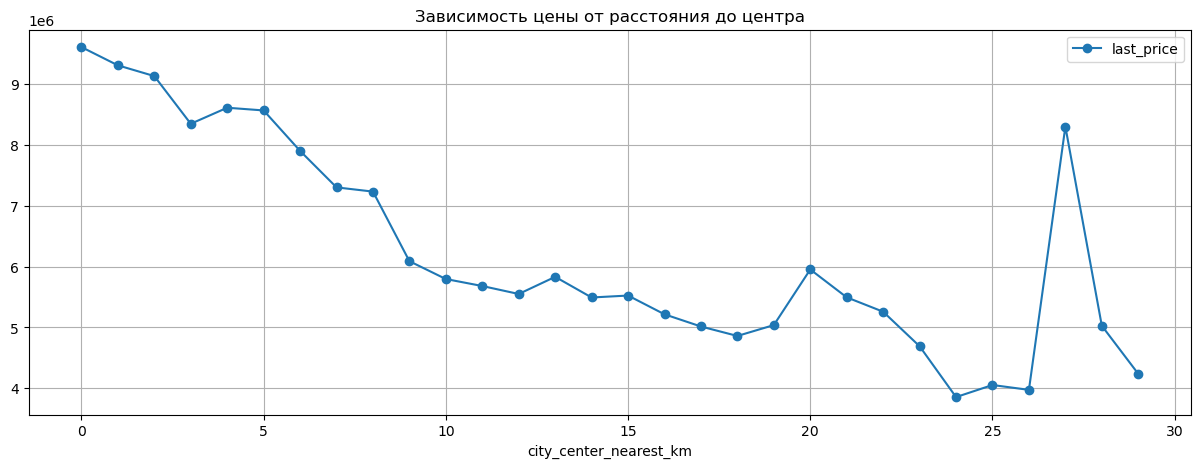

In [155]:
price_sp.plot(style=('o-'),grid=True,figsize=(15,5),legend=True)
plt.title('Зависимость цены от расстояния до центра')

На данном графике, мы видим, что самая большая цена находится в близи центра города и уменьшая по мере его отдаления.
Также есть скачок вверх в пределах 27 км, далее резкий скачок вниз, возможно это связано с пересечением границ Лен. области и расположением в этом радиусе других городов.

Вывод:
    
В ходе исследовательского анализа:
    
    1) Просмотрели и описали параметры исходных данных;
    2) Определили факторы, которые напрямую влияют на цену квартиры - общая и жилая площадь;
    3) Построили графики и посмотрели как аномальные значения влияют на корреляцию;
    4) Нашли топ наиболее дорогих и дешевых цен квадратного метра недвижимости;
    5) Также выяснили, что цен на квартиры в Санкт-Петерурге наиболее дорогие к центру города;
    6) Типичная квартира на продажу: 1/2 комнаты, с потолками высотой 2.6 метров, также расположеннная в 5/10 этажном доме на этаже по середине дома.

## общий вывод

В ходе исследования:
    
    1) Ознакомились с исходными данными и получили общую информацию.
    
    2) Выполнили предобработку данных
    -Заменили пропуски на медианные и средние значения там, где это было возможно; 
    -Сменили тип данных в столбцах, где это было необходимо;
    -Исправили неявные дубликаты.
    
    3)Добавили дополнительные столбцы для дальнеших рассчетов
    
    4) Выполнили исследовательский анализ
    -Насколько быстро продается жилая недвижимость и какие сроки считаются 'нормальными';
    -Определили сколько комнат в большинстве продаваемых квартирах;
    -Также выяснили, что наиболее часто встречающиеся квартиры находятся в пределах 10-15 км от центра города;
    -Выяснили от чего может зависеть итоговая цена на жилую недвижимость;
    -Вычислили самую дорогую и дешевую недвижимость;
    -Выяснили, что ближе к центру Санкт-Петербурга квартиры стоят дороже;
    
Таким образом, наиболее часто встречающимися объявлениями будут: одна или двух комнатные квартирки в спальных районах, в типичных 5/9 этажных домиках, с высотой потолков в 2.6 м. Также при выборе жилой недвижимости стоит обращать внимание на общую и жилую площадь помещения, если речь идет о Санкт-Петебурге, то наиболее дешевыми вариантами будут окраины города, города в области: 15-25 км от центра города, по мере приближения к центру, цены будут расти.

Также отдельное внимание стоит удилть остутвию или ошибкам в  исходных данных, в файле большое кол-во пропусков, что значительно затрудняет, поиск зависимостей и проведение исследований. 

Из основных моментов:

1) Пропуски, которые не удалось заменить в столбцах, которые получены автоматически (столбцы: park_nearest и ponds_nearest), возможно стоит расширить диапозон и увеличить его до максимального расстояния , также можно поделить данные на категории ( 0-1499: 'менее 1.5 км', 1500-3000: 'В пределанах 3 км', 3000 - ...: 'Свыше 3 км'. Что касается, расстояния до центра города, то тут сложно обозначить проблему, если брать в расчет, что в исходных данных также есть послёлки и деревни, возможно и стоило бы измерять расстояние до центра города Санкт-Петербург, но эти значения были бы аномальными и непригодными для дальнейшего анализа, так что по этому столбцу ок. 

2) Далее пропуски связанные с булевыми значениями is_apartment, возможно в анкете для заполнения объявления необходимо добавить обозначение со звездочкой, что является апартаментами ( я считаю, что так нужно делать со всеми словами вызывающими вопросы) т.к. предполагаю, что большинство людей просто на просто не знают, что это значит.

3) Пропуски в графе балкон, мое предположение, что отстутвие данных означает отстутсиве балкона, выход в данной ситуации такой же как я описывал ранее, сделать категории:( Кол-во балконов: 0, 1, 2, ..., 'Другое' и указать своей кол-во)

4) Типичные ошибки в написании населенного пункта, которые приводят к неявным дубликатам, можно исправить функцией определения местоположения ( предварительно создав базу со всеми населёнными пунктами Лен. области), чтобы избежать разного написания одного и того же места.



    